# 영화 리뷰 분류 : 이진 분류 문제
- p147

## imdb 데이터셋 가져오기

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) # 가장 자주 등장하는 단어 1만개로 제한

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0][:3] # 형태소 분석, 텍스트 마이닝 할 때 나오는 숫자 개념

[1, 14, 22]

In [3]:
train_labels[0] # 부정적인 문장 0, 긍정적인 문장 1

1

In [4]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index =  dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 정수 시퀀스를 멀티-핫 인코딩으로 인코딩
- p149
  - 텍스트 데이터는, 문장 길이가 다 달라서, 바로 행렬로 변환이 어렵다
    - 방법 1 : 같은 길이가 되도록 리스트에 패딩 0을 추가
    - 방법 2 : 멀티-핫 인코딩으로 0과 1의 벡터로 변환

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.

  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [9]:
len(x_train[0]), len(x_train[1])

(10000, 10000)

In [10]:
x_train.shape

(25000, 10000)

In [11]:
x_test.shape

(25000, 10000)

## y값 벡터 변환

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 신경망 모델 만들기
- Dense 층을 쌓기
  - 얼마나 많은 층을 사용할 것인가?
  - 각층에 얼마나 많은 은닉층을 사용할 것인가?
  - 얼마나 많은 unit

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid') # 이진분류
])

# 모델 컴파일하기
model.compile(
    optimizer='rmsprop', # SGD 확률적 경사하강법
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

## 훈련 검증

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 모델 훈련

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 56ms/step - loss: 0.5281 - accuracy: 0.7655 - val_loss: 0.3939 - val_accuracy: 0.8576
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3144 - accuracy: 0.8957 - val_loss: 0.3263 - val_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2356 - accuracy: 0.9219 - val_loss: 0.2886 - val_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1888 - accuracy: 0.9347 - val_loss: 0.2757 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1590 - accuracy: 0.9465 - val_loss: 0.2781 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1342 - accuracy: 0.9575 - val_loss: 0.2868 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1189 - accuracy: 0.9614 - val_loss: 0.2985 - val_accuracy: 0.8837
Epoch 8/20
30

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 훈련과 검증 손실 그리기

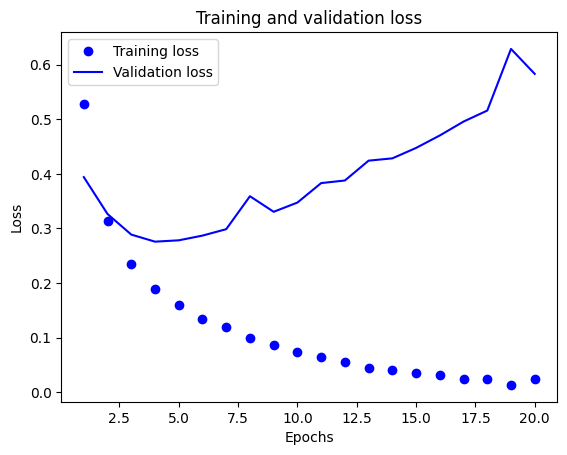

In [28]:
import matplotlib.pyplot as plt

# 그래프에서 과적합이 발생했음을 파악
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 훈련과 검증 정확도 그리기

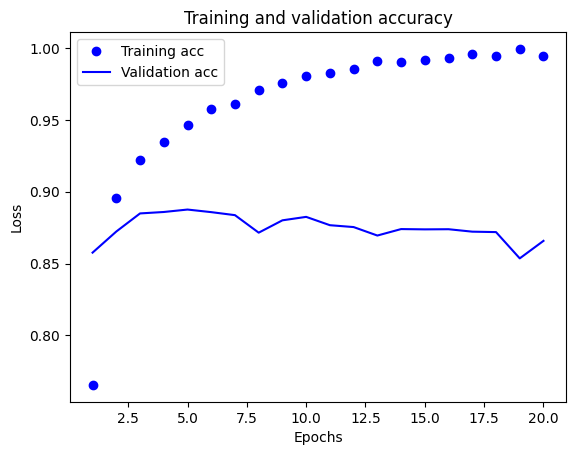

In [29]:
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- 미니 과제
  - history 입력 시 그래프 반환하는 함수 정의해보기

In [32]:
def vis(history):
  history_dict = history.history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  epochs = range(1, len(loss_values) + 1)

  figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))

  ax[0].plot(epochs, loss_values, "bo", label="Training loss")
  ax[0].plot(epochs, val_loss_values, "b", label="Validation loss")
  ax[0].set_title("Training and validation loss")
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Loss")
  ax[0].legend()

  ax[1].plot(epochs, acc, "bo", label="Training acc")
  ax[1].plot(epochs, val_acc, "b", label="Validation acc")
  ax[1].set_title("Training and validation accuracy")
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Accuracy")
  ax[1].legend()

  plt.show()

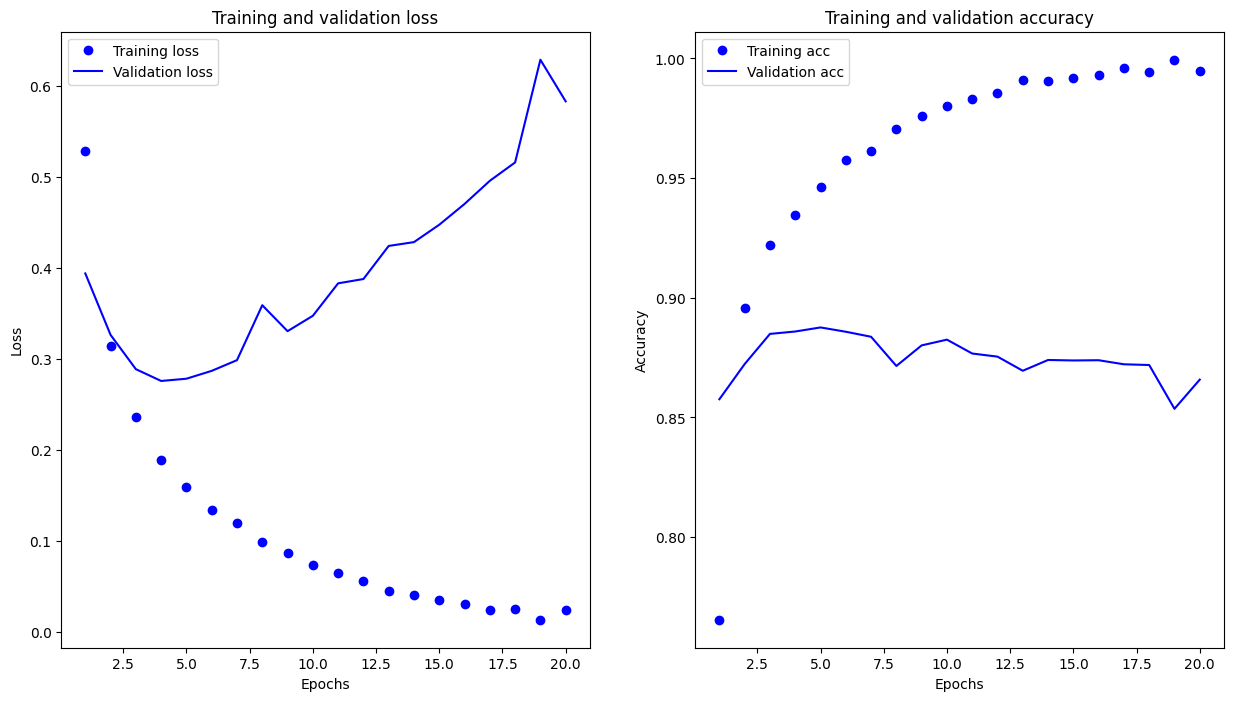

In [33]:
vis(history)